In [25]:
import os

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

""" sklearn 資料集 """
from sklearn import datasets                                   # 各種經典資料集, 詳見 sklearn 官網

""" 資料預處理 """
# 資料歸一化 
from sklearn.preprocessing   import MinMaxScaler               # 歸一到 [0,1]
from sklearn.preprocessing   import MaxAbsScaler               # 歸一到 [0,1]
from sklearn.preprocessing   import StandardScaler             # 歸一到 [-1,1]

# 資料重新編碼
from sklearn.preprocessing   import LabelEncoder               # 標籤編碼
from sklearn.preprocessing   import OneHotEncoder              # 獨熱編碼, 也可用 df = pd.get_dummies(df) ( pandas方法 )

""" 資料切分 """
from sklearn.model_selection import train_test_split           # 切分 訓練集 & 測試集

""" 常用模型 (迴歸 & 分類)"""
# 迴歸模型
from sklearn.linear_model    import LinearRegression           # 線性迴歸
from sklearn.linear_model    import Lasso                      # 線性迴歸 + l1正則項
from sklearn.linear_model    import Ridge                      # 線性迴歸 + l2正則項
from sklearn.tree            import DecisionTreeRegressor      # 決策樹迴歸
from sklearn.ensemble        import RandomForestRegressor      # 隨機森林迴歸
from sklearn.ensemble        import GradientBoostingRegressor  # 梯度提升迴歸

# 分類模型
from sklearn.linear_model    import LogisticRegression         # 羅吉斯迴歸分類
from sklearn.tree            import DecisionTreeClassifier     # 決策樹分類
from sklearn.ensemble        import RandomForestClassifier     # 隨機森林分類
from sklearn.neighbors       import KNeighborsClassifier       # k鄰近分類

""" 超參數選取"""
from sklearn.model_selection import KFold                      # KFold 驗證
from sklearn.model_selection import GridSearchCV               # 超參數組合窮舉 & 選取 (內含交叉驗證)
from sklearn.model_selection import cross_val_score            # 交叉驗證

""" 模型評估常用指標 """
# 迴歸模型指標
from sklearn.metrics         import mean_absolute_error        # MAE
from sklearn.metrics         import mean_squared_error         # MSE
from sklearn.metrics         import r2_score                   # R square

# 分類模型指標
from sklearn.metrics         import roc_auc_score              # ROC & AUC
from sklearn.metrics         import accuracy_score             # accuracy
from sklearn.metrics         import precision_score            # Precision
from sklearn.metrics         import recall_score               # Recall
from sklearn.metrics         import f1_score                   # F1

In [27]:
""" 使用 Kaggle  資料集 """
# 設定資料路徑
dir_data = './data/data-science-london-scikit-learn/'
path_train = os.path.join(dir_data, 'train.csv')
path_trainLabels = os.path.join(dir_data, 'trainLabels.csv')
path_test = os.path.join(dir_data, 'test.csv')

# 讀取資料集 (使用 pd.read_csv)
x_train = pd.read_csv(path_train,header=None)
y_train = pd.read_csv(path_trainLabels,header=None)
x_test = pd.read_csv(path_test,header=None)

""" 預覽 & 統計描述 """
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test  shape: ', x_test.shape)
print('x_test  first five rows: \n', x_train.head())
x_train.describe()

x_train shape:  (1000, 40)
y_train shape:  (1000, 1)
x_test  shape:  (9000, 40)
x_test  first five rows: 
          0         1         2         3         4         5         6   \
0  0.299403 -1.226624  1.498425 -1.176150  5.289853  0.208297  2.404498   
1 -1.174176  0.332157  0.949919 -1.285328  2.199061 -0.151268 -0.427039   
2  1.192222 -0.414371  0.067054 -2.233568  3.658881  0.089007  0.203439   
3  1.573270 -0.580318 -0.866332 -0.603812  3.125716  0.870321 -0.161992   
4 -0.613071 -0.644204  1.112558 -0.032397  3.490142 -0.011935  1.443521   

         7         8         9   ...        30        31        32        33  \
0  1.594506 -0.051608  0.663234  ... -0.850465 -0.622990 -1.833057  0.293024   
1  2.619246 -0.765884 -0.093780  ... -0.819750  0.012037  2.038836  0.468579   
2 -4.219054 -1.184919 -1.240310  ... -0.604501  0.750054 -3.360521  0.856988   
3  4.499666  1.038741 -1.092716  ...  1.022959  1.275598 -3.480110 -1.065252   
4 -4.290282 -1.761308  0.807652  ...  0.51

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [28]:
x_train.isnull().any().any()   # 每個 column 缺失值數量

False

In [29]:
""" 欄位依屬性處理 """
x_train.dtypes           # 查看個欄位屬性

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
dtype: object

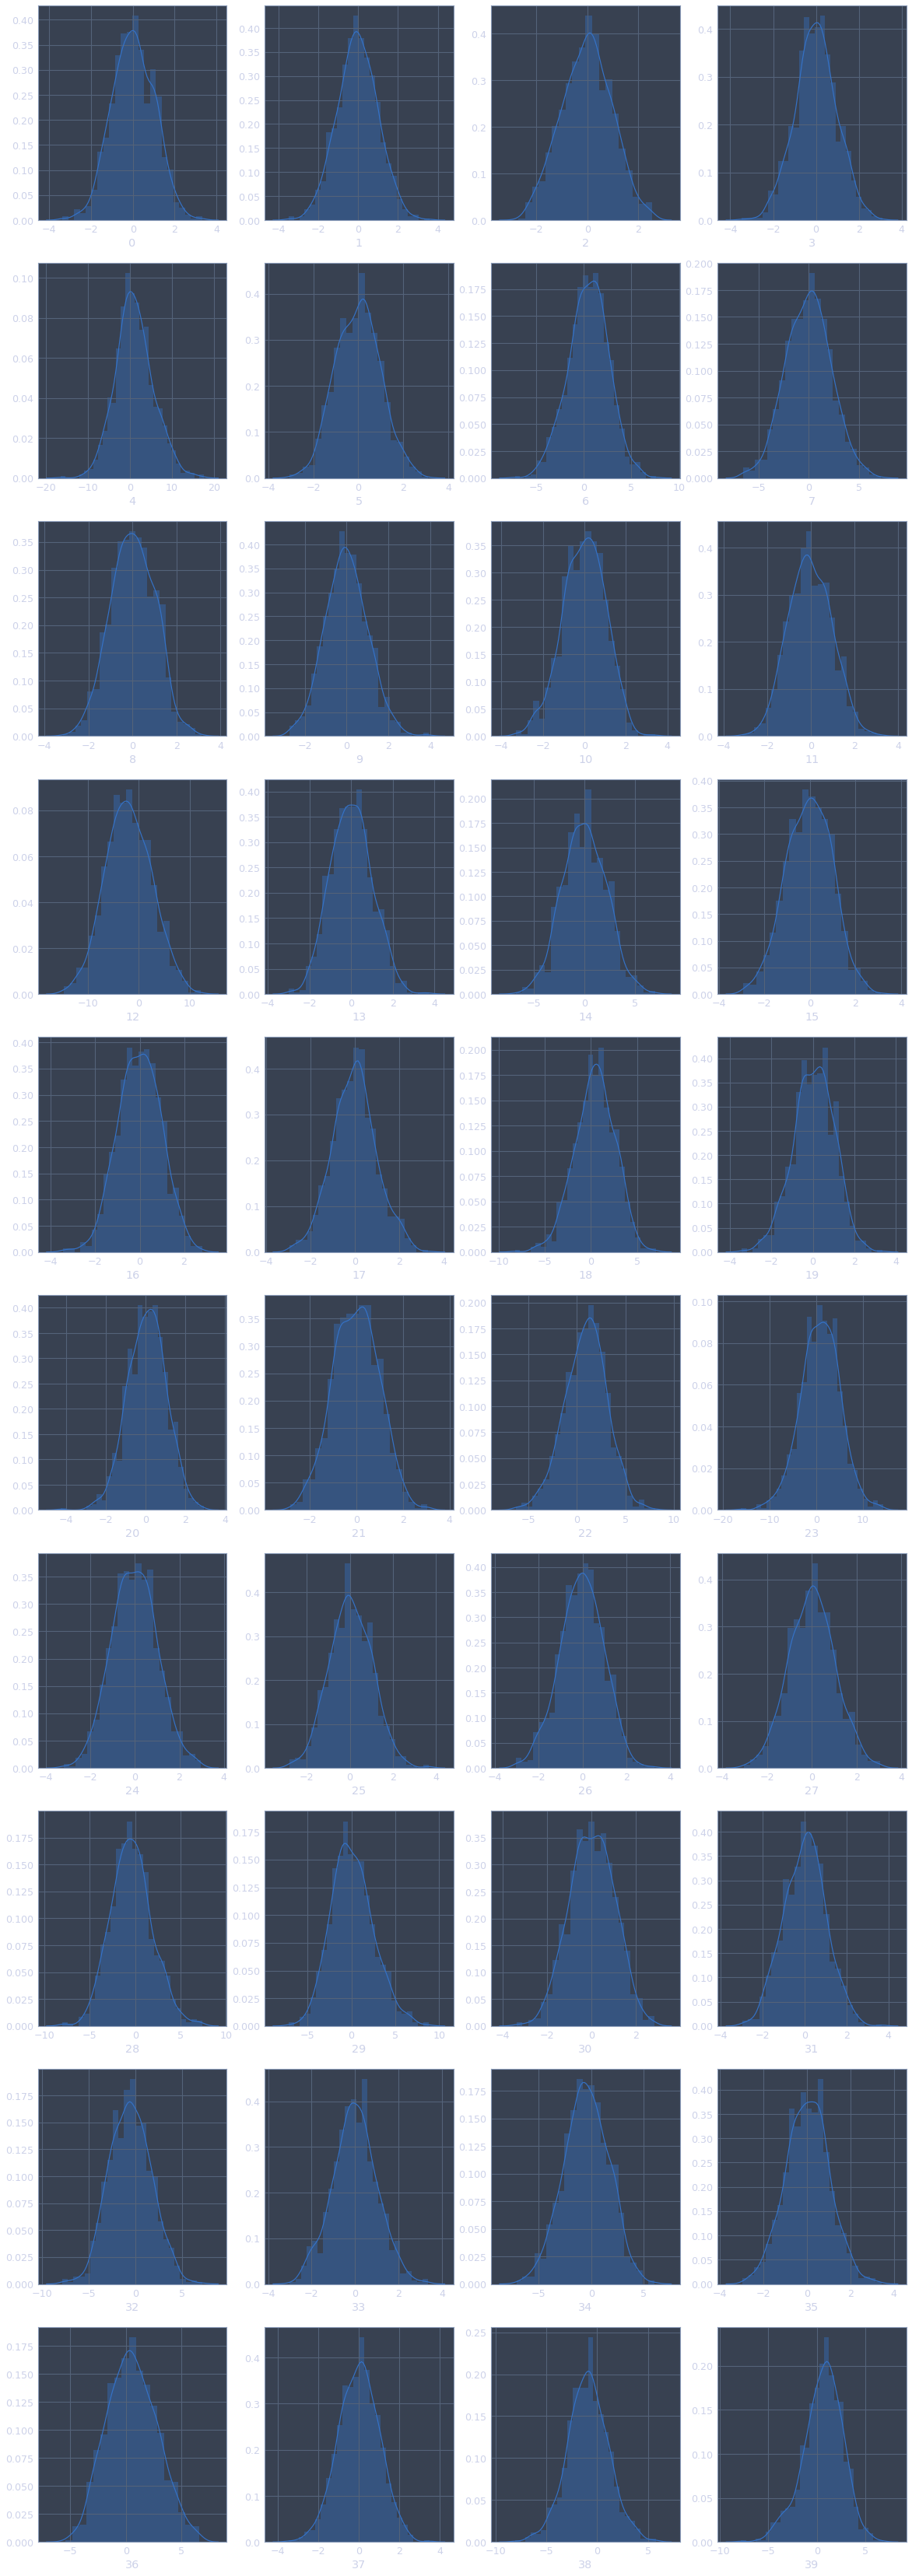

In [30]:
nrows = 10
ncols = 4
plt.figure(figsize=(20,60))
for i,col in zip(range(len(x_train.columns)),x_train.columns):
    plt.subplot(nrows, ncols, i+1)
    sns.distplot(x_train[col])
plt.show()    

In [31]:
# 數值欄位, 特徵縮放 ( Day12 )
scaler = MinMaxScaler()       # 歸一到 [0,1]
scaler = MaxAbsScaler()       # 歸一到 [0,1]
scaler = StandardScaler()     # 歸一到 [-1,1]

In [32]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)
# 建立模型
rfclf = RandomForestClassifier()
# 訓練模型
rfclf.fit(x_train, y_train)
# 預測測試集
y_pred = rfclf.predict(x_test)
# 羅列多種可能超參數 (超參數因模型而異 )
n_estimators_list = [50, 150, 250, 290]
max_depth_list = [1, 3, 4, 5, 8]

# 編成字典
param_grid = dict(n_estimators = n_estimators_list, max_depth = max_depth_list)

# 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算; cv是 cross validation, 表示資料切割的份數 )
grid_search = GridSearchCV(rfclf, param_grid, scoring="accuracy", n_jobs=-1, verbose=1,cv = 5)

# 搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

# 查看最佳參數
print (grid_result.best_params_,grid_result.best_score_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 8, 'n_estimators': 290} 0.85


In [33]:
rfclf_best = RandomForestClassifier(max_depth=grid_result.best_params_['max_depth'],
                                    n_estimators=grid_result.best_params_['n_estimators'])
rfclf_best.fit(x_train, y_train)

y_valid_pred = rfclf_best.predict(x_valid)
print(accuracy_score(y_valid_pred,y_valid))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.915


In [39]:
y_pred=rfclf_best.predict(x_test)

submission = pd.DataFrame(y_pred)
submission.shape[0]
submission.columns = ['Solution']
submission['Id'] = np.arange(1,submission.shape[0]+1)
submission = submission[['Id', 'Solution']]
print(submission.head(),'\n',submission.tail())
submission.to_csv('data/data-science-london-scikit-learn/submission_no_normalization.csv', index = False)

   Id  Solution
0   1         1
1   2         0
2   3         0
3   4         0
4   5         0 
         Id  Solution
8995  8996         1
8996  8997         1
8997  8998         1
8998  8999         0
8999  9000         1


<img src="./data/data-science-london-scikit-learn/Untitled.png">